# How to compute a functional map?

In [1]:
import numpy as np

from geomfum.dataset import NotebooksDataset
from geomfum.descriptor.pipeline import (
    ArangeSubsampler,
    DescriptorPipeline,
    L2InnerNormalizer,
)
from geomfum.descriptor.spectral import HeatKernelSignature, WaveKernelSignature
from geomfum.functional_map import (
    FactorSum,
    LBCommutativityEnforcing,
    OperatorCommutativityEnforcing,
    SpectralDescriptorPreservation,
)

from geomfum.deep_functional_map import ForwardFunctionalMap
from geomfum.shape import TriangleMesh

[Load meshes](load_mesh_from_file.ipynb).

In [2]:
dataset = NotebooksDataset()

mesh_a = TriangleMesh.from_file(dataset.get_filename("cat-00"))
mesh_b = TriangleMesh.from_file(dataset.get_filename("lion-00"))

[Set Laplace eigenbasis](./mesh_laplacian_spectrum.ipynb) for each mesh.

In [3]:
mesh_a.laplacian.find_spectrum(spectrum_size=40, set_as_basis=True)
mesh_b.laplacian.find_spectrum(spectrum_size=40, set_as_basis=True)

mesh_a.basis.use_k = 10
mesh_b.basis.use_k = 8



Set a [descriptor pipeline](./descriptor_pipeline.ipynb) and apply it to both shapes.

In [4]:
steps = [
    HeatKernelSignature.from_registry(n_domain=100),
    ArangeSubsampler(subsample_step=2),
    L2InnerNormalizer(),
]

pipeline = DescriptorPipeline(steps)

In [5]:
descr_a = pipeline.apply(mesh_a)
descr_b = pipeline.apply(mesh_b)

In [6]:
descr_a.shape

(50, 7207)

Solve for the functional map matrix performing the forward pass.

In [7]:
ffm = ForwardFunctionalMap(0,1)

In [8]:
fmap = ffm(mesh_a, mesh_b, descr_a,descr_b)


IndexError: index 8 is out of bounds for dimension 0 with size 8

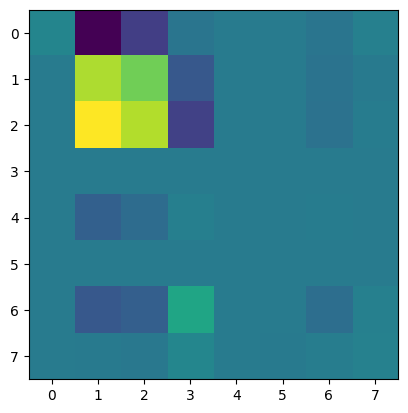

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(fmap)

## Further reading

* [How to compute a pointwise map from a functional map?](./pointwise_from_functional.ipynb)

* [How to refine a functional map?](./refine_functional_map.ipynb)

* [How to use ReMatching to compute a functional map?](./rematching.ipynb)